In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gbw.csv')

In [3]:
df

,Total_Weight,Planet_Gears,Input_Shaft,Output_Shaft,Housing,Ring_Gear,Sun_Gear,Carrier,Bearings,Seals
0,52,10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6
1,93,18.6,9.3,9.3,18.6,14.0,11.2,7.4,6.5,2.8
2,15,3.0,1.5,1.5,3.0,2.2,1.8,1.2,1.0,0.4
3,72,14.4,7.2,7.2,14.4,10.8,8.6,5.8,5.0,2.2
4,61,12.2,6.1,6.1,12.2,9.2,7.3,4.9,4.3,1.8
...,...,...,...,...,...,...,...,...,...,...
3995,17,3.4,1.7,1.7,3.4,2.6,2.0,1.4,1.2,0.5
3996,34,6.8,3.4,3.4,6.8,5.1,4.1,2.7,2.4,1.0
3997,16,3.2,1.6,1.6,3.2,2.4,1.9,1.3,1.1,0.5
3998,60,12.0,6.0,6.0,12.0,9.0,7.2,4.8,4.2,1.8


# Data Cleaning

In [4]:
df.describe()

,Total_Weight,Planet_Gears,Input_Shaft,Output_Shaft,Housing,Ring_Gear,Sun_Gear,Carrier,Bearings,Seals
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,49.578750,9.915750,4.957875,4.957875,9.915750,7.433825,5.949275,3.966475,3.471725,1.486950
std,29.059059,5.811812,2.905906,2.905906,5.811812,4.358280,3.487817,2.324284,2.034155,0.872198
min,1.000000,0.200000,0.100000,0.100000,0.200000,0.200000,0.100000,0.100000,0.100000,0.000000
25%,24.000000,4.800000,2.400000,2.400000,4.800000,3.600000,2.900000,1.900000,1.700000,0.700000
50%,49.000000,9.800000,4.900000,4.900000,9.800000,7.400000,5.900000,3.900000,3.400000,1.500000
75%,74.000000,14.800000,7.400000,7.400000,14.800000,11.100000,8.900000,5.900000,5.200000,2.200000
max,100.000000,20.000000,10.000000,10.000000,20.000000,15.000000,12.000000,8.000000,7.000000,3.000000


In [5]:
missing_values = df.isnull().sum()

In [6]:
print(missing_values)

Total_Weight    0
Planet_Gears    0
Input_Shaft     0
Output_Shaft    0
Housing         0
Ring_Gear       0
Sun_Gear        0
Carrier         0
Bearings        0
Seals           0
dtype: int64


# Data Visualization

<Axes: xlabel='Seals', ylabel='Total_Weight'>

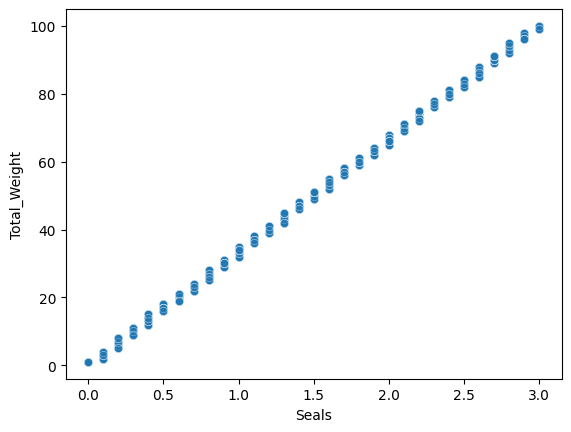

In [48]:
sns.scatterplot(data=df, x='Seals', y='Total_Weight', alpha=0.5)

Text(0, 0.5, 'Count')

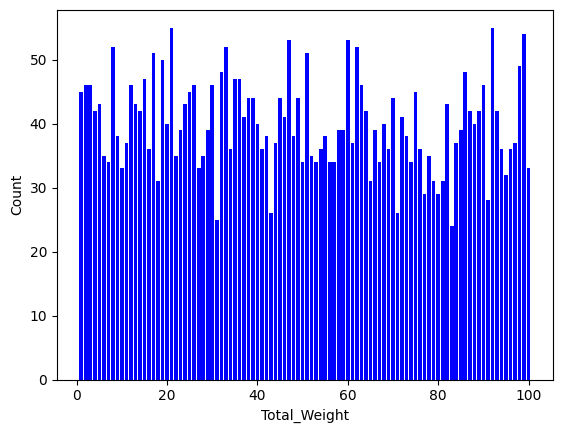

In [8]:
import matplotlib.pyplot as plt
counts = df['Total_Weight'].value_counts()
plt.bar(counts.index, counts.values, color='blue')
plt.xlabel('Total_Weight')
plt.ylabel('Count')

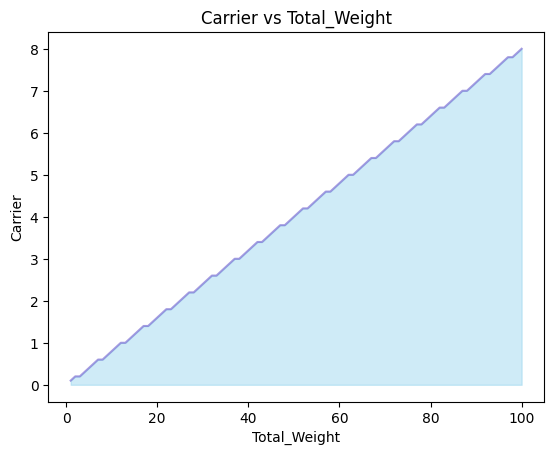

In [9]:
import numpy as np
import matplotlib.pyplot as plt
groups = df.groupby('Total_Weight').mean()
x = groups.index
y = groups['Carrier']
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.plot(x, y, color="Slateblue", alpha=0.6)
plt.xlabel('Total_Weight')
plt.ylabel('Carrier')
plt.title('Carrier vs Total_Weight')
plt.show()

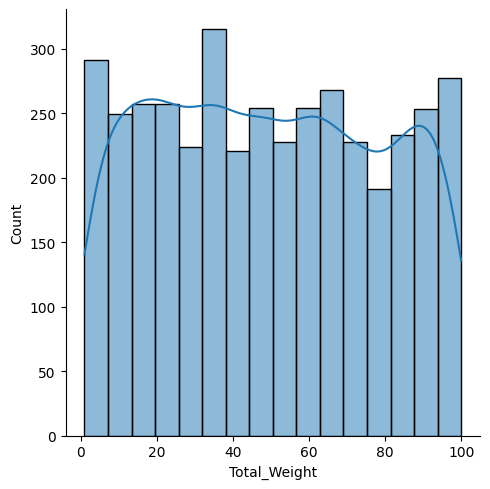

In [10]:
sns.displot(data=df, x='Total_Weight', kde=True)

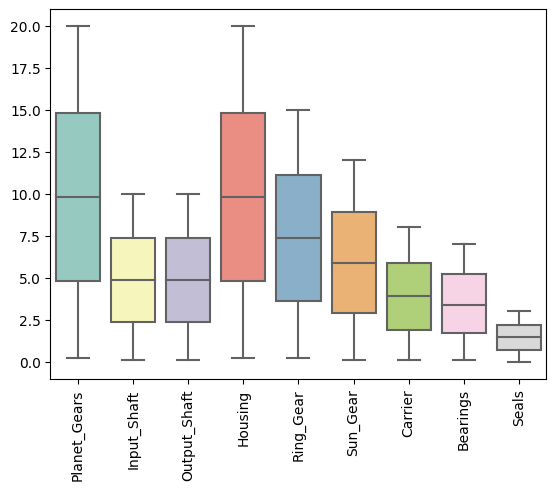

In [11]:
sns.boxplot(data=df.drop('Total_Weight', axis=1), palette='Set3')
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

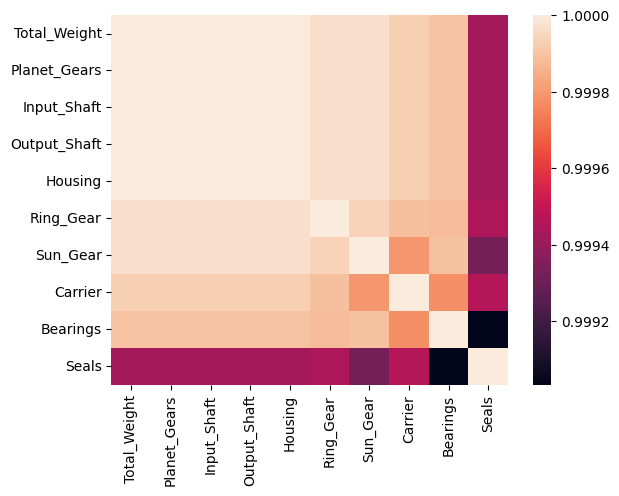

In [12]:
sns.heatmap(df.corr())

In [13]:
X = df.drop(columns=['Total_Weight'])
y = df['Total_Weight']

# Data Splitting

In [14]:
X

,Planet_Gears,Input_Shaft,Output_Shaft,Housing,Ring_Gear,Sun_Gear,Carrier,Bearings,Seals
0,10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6
1,18.6,9.3,9.3,18.6,14.0,11.2,7.4,6.5,2.8
2,3.0,1.5,1.5,3.0,2.2,1.8,1.2,1.0,0.4
3,14.4,7.2,7.2,14.4,10.8,8.6,5.8,5.0,2.2
4,12.2,6.1,6.1,12.2,9.2,7.3,4.9,4.3,1.8
...,...,...,...,...,...,...,...,...,...
3995,3.4,1.7,1.7,3.4,2.6,2.0,1.4,1.2,0.5
3996,6.8,3.4,3.4,6.8,5.1,4.1,2.7,2.4,1.0
3997,3.2,1.6,1.6,3.2,2.4,1.9,1.3,1.1,0.5
3998,12.0,6.0,6.0,12.0,9.0,7.2,4.8,4.2,1.8


In [15]:
y

0       52
1       93
2       15
3       72
4       61
        ..
3995    17
3996    34
3997    16
3998    60
3999    66
Name: Total_Weight, Length: 4000, dtype: int64

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fitting the Algorithms

In [17]:
Lin=LinearRegression() 
Log=LogisticRegression() 
Las=Lasso() 
Rid=Ridge() 
Eln=ElasticNet()

In [18]:
Lin.fit(X_train,y_train)

LinearRegression()

In [19]:
Log.fit(X_train,y_train)

LogisticRegression()

In [20]:
Las.fit(X_train,y_train)

Lasso()

In [21]:
Rid.fit(X_train,y_train)

Ridge()

In [22]:
Eln.fit(X_train,y_train)

ElasticNet()

In [23]:
y_pred_Lin=Lin.predict(X_test)

In [24]:
y_pred_Log=Log.predict(X_test)

In [25]:
y_pred_Las=Las.predict(X_test)

In [26]:
y_pred_Rid=Rid.predict(X_test)

In [27]:
y_pred_Eln=Eln.predict(X_test)

# User Input Prediction

In [42]:
result = Lin.predict(pd.DataFrame([[10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6]], columns=['Planet_Gears','Input_Shaft','Output_Shaft','Housing','Ring_Gear','Sun_Gear','Carrier','Bearings','Seals']))
result *= 500
print(result)

[26000.]


In [43]:
result = Log.predict(pd.DataFrame([[10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6]], columns=['Planet_Gears','Input_Shaft','Output_Shaft','Housing','Ring_Gear','Sun_Gear','Carrier','Bearings','Seals']))
result *= 500
print(result)

[31000]


In [44]:
result = Las.predict(pd.DataFrame([[10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6]], columns=['Planet_Gears','Input_Shaft','Output_Shaft','Housing','Ring_Gear','Sun_Gear','Carrier','Bearings','Seals']))
result *= 500
print(result)

[25992.86454843]


In [45]:
result = Rid.predict(pd.DataFrame([[10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6]], columns=['Planet_Gears','Input_Shaft','Output_Shaft','Housing','Ring_Gear','Sun_Gear','Carrier','Bearings','Seals']))
result *= 500
print(result)

[25998.56602976]


In [46]:
result = Eln.predict(pd.DataFrame([[10.4,5.2,5.2,10.4,7.8,6.2,4.2,3.6,1.6]], columns=['Planet_Gears','Input_Shaft','Output_Shaft','Housing','Ring_Gear','Sun_Gear','Carrier','Bearings','Seals']))
result *= 500
print(result)

[25981.21739427]


# Model Evalutaion

In [33]:
print('LinearRegression:\n')  
print('R2 score',r2_score(y_test,y_pred_Lin))
r2 = r2_score(y_test, y_pred_Lin)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Lin))
print('Mean squared error',mean_squared_error(y_test,y_pred_Lin))
mse = mean_squared_error(y_test, y_pred_Lin)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

LinearRegression:

R2 score 1.0
Adjusted R-squared: 1.0
Mean absolute error 8.873457524316563e-16
Mean squared error 6.75862743523924e-30
Root Mean squared error: 2.599736031838471e-15


In [34]:
print('R2 score',r2_score(y_test,y_pred_Log))
r2 = r2_score(y_test, y_pred_Log)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Log))
print('Mean squared error',mean_squared_error(y_test,y_pred_Log))
mse = mean_squared_error(y_test, y_pred_Log)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

R2 score 0.9696315116144104
Adjusted R-squared: 0.9693243714031782
Mean absolute error 3.6575
Mean squared error 26.19
Root Mean squared error: 5.117616632769594


In [35]:
print('Lasso:\n') 
print('R2 score',r2_score(y_test,y_pred_Las))
r2 = r2_score(y_test, y_pred_Las)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Las))
print('Mean squared error',mean_squared_error(y_test,y_pred_Las))
mse = mean_squared_error(y_test, y_pred_Las)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

Lasso:

R2 score 0.9999645404621635
Adjusted R-squared: 0.999964181832198
Mean absolute error 0.15196569573645974
Mean squared error 0.030580557192892533
Root Mean squared error: 0.1748729744497203


In [36]:
print('Ridge:\n') 
print('R2 score',r2_score(y_test,y_pred_Rid))
r2 = r2_score(y_test, y_pred_Rid)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Rid))
print('Mean squared error',mean_squared_error(y_test,y_pred_Rid))
mse = mean_squared_error(y_test, y_pred_Rid)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

Ridge:

R2 score 0.9999999051960823
Adjusted R-squared: 0.9999999042372563
Mean absolute error 0.006866743902864364
Mean squared error 8.17595717166138e-05
Root Mean squared error: 0.0090420999616579


In [38]:
print('ElasticNet:\n')
print('R2 score',r2_score(y_test,y_pred_Eln))
r2 = r2_score(y_test, y_pred_Eln)
n = len(X_test)
p = 8
adj_r2 = 1 - ((1 - r2)*(n - 1)/(n - p - 1))
print("Adjusted R-squared:", adj_r2)
print('Mean absolute error',mean_absolute_error(y_test,y_pred_Eln))
print('Mean squared error',mean_squared_error(y_test,y_pred_Eln))
mse = mean_squared_error(y_test, y_pred_Eln)
rmse = np.sqrt(mse)
print('Root Mean squared error:', rmse)

ElasticNet:

R2 score 0.9999335703809904
Adjusted R-squared: 0.9999328985264365
Mean absolute error 0.2093805343889013
Mean squared error 0.05728937508417954
Root Mean squared error: 0.2393519899315223


In [39]:
#import pickle

#pickle.dump(df,open('dfw.pkl','wb'))
#pickle.dump(Lin,open('Linw.pkl','wb'))